# Find best parameters describing data, both combined and separated fits. 
# Then run simulations on the cluster


Since most of the fits are chaotic, I repeat simulations multiple times (20).


In [1]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
import pandas as pd
import functions_optimal as fun
import functions_dynamics as fun_dyna
from scipy.interpolate import interp1d,interp2d

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42
area=4.0;linethicknes=1.0;



Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Train DNN 

In [3]:
folder='/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/Figure_7/with_different_CV_K/simulations/'
results=np.loadtxt(folder+'results.txt');
folder='/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/Figure_7/with_different_CV_K_larger_J_long/simulations/'
results=np.concatenate((results,np.loadtxt(folder+'results.txt')));
folder='/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/Figure_7/with_different_CV_K_larger_J_long_2/simulations/'
results=np.concatenate((results,np.loadtxt(folder+'results.txt')));

sim_param_all=results[:,0:15]
moments_of_r_sim_all=results[:,15:20]

sim_g_E=(sim_param_all[:,2])
sim_g_I=(sim_param_all[:,3])
sim_beta=(sim_param_all[:,4])
sim_CV_K=(sim_param_all[:,7])
sim_sigma_Lambda_over_Lambda=(sim_param_all[:,10])
sim_J=(sim_param_all[:,11])
sim_r_X=(sim_param_all[:,12])
sim_ell=(sim_param_all[:,13])

print(np.shape(results))
#(121278, 28)


(129956, 28)


In [4]:
# Train DNN
Predictor_sim,Predictor_data=fun.build_function(results)

Test R^2 Score : 0.941
Training R^2 Score : 0.953


In [5]:
# Load recordings in mice and monkeys

In [6]:
data_mice=np.loadtxt('Mice_with_trials.txt');
data_monkeys=np.loadtxt('Monkeys_with_trials.txt');

data_both_species=[data_mice,data_monkeys]
# structure of data set is:
# unit number, contrast, laser, rate, other stuff

dataset_both_species,Con_both_species,nCon_both_species,normalization_both_species=[],[],[],[]
for idx_species in range(2):
    dataset,Con,nCon=fun.build_dataset(data_both_species[idx_species])
    normalization=1.0;#np.mean(dataset[0,:,0])
    dataset_both_species=dataset_both_species+[dataset]
    Con_both_species=Con_both_species+[Con]
    nCon_both_species=nCon_both_species+[nCon]
    normalization_both_species=normalization_both_species+[normalization]


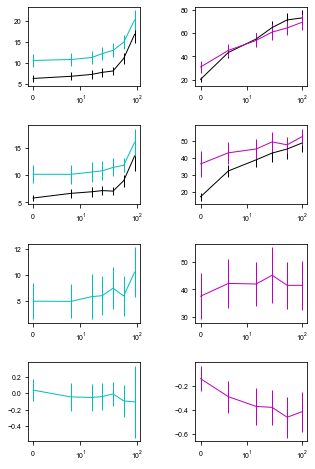

In [7]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()



for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]

    for idx_moment in range(6):
        if idx_moment<2:
            idx_row=0
            ccc=['k',colors[idx_species]][idx_moment]
            
        if (idx_moment>=2)&(idx_moment<4):
            idx_row=1
            ccc=['k',colors[idx_species]][idx_moment-2]

        if (idx_moment==4):
            idx_row=2
            ccc=colors[idx_species]

        if (idx_moment==5):
            idx_row=3
            ccc=colors[idx_species]
            
        axs[2*idx_row+idx_species].errorbar(Con,dataset[idx_moment,:,0],dataset[idx_moment,:,1],
                                                 color=ccc,)

        axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)




# Best fit in separated

In [8]:
nRep=101;
ALL_sol,ALL_cost=[],[]
for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]
    sol,cost=fun.fit_model_to_data(dataset,Predictor_data,nCon,nRep)
    
    ALL_sol=ALL_sol+[sol]
    ALL_cost=ALL_cost+[cost]


rep= 0  param init= [ 6.7   3.13 -0.49 -3.3   0.24 -4.97]
[ 6.7   3.13 -0.49 -3.3   0.24 -4.98] 185.42120292598824
rep= 1  param init= [ 5.01  2.52 -0.51 -3.3   0.12 -3.29]
[ 4.29  2.84 -0.62 -2.34 -0.3  -2.61] 1.4220133881779788
rep= 2  param init= [ 3.6   3.04 -0.84 -3.3  -0.1  -3.01]
[ 4.26  3.71 -0.85 -2.17  0.18 -3.14] 1.5125466201675313
rep= 3  param init= [ 9.81  2.39 -0.64 -3.3   0.2  -3.09]
[10.    3.3  -0.66 -3.06  0.12 -2.56] 16.550143785648906
rep= 4  param init= [ 7.78  2.2  -0.79 -3.3   0.72 -4.78]
[ 7.76  2.19 -0.81 -3.29  0.72 -4.75] 164.65469882376212
rep= 5  param init= [ 6.5   4.91 -0.33 -3.3   0.12 -3.21]
[ 7.83  6.67 -0.7  -1.52 -0.13 -2.82] 0.8311435847267314
rep= 6  param init= [ 4.3   2.25 -0.99 -3.3   0.95 -4.83]
[ 4.96  2.59 -1.   -3.13  0.57 -5.  ] 102.03182699447987
rep= 7  param init= [ 5.32  3.64 -0.24 -3.3  -0.07 -4.34]
[ 5.91  3.25 -0.45 -3.32 -0.04 -4.34] 175.90528255393252
rep= 8  param init= [ 6.96  4.35 -0.2  -3.3  -0.02 -4.1 ]
[ 7.48  4.08 -0.32 -3.

[ 4.93e+00  2.97e+00 -4.05e-03 -3.28e+00 -4.48e-01 -3.23e+00] 52.47740652081252
rep= 72  param init= [ 7.59  3.65 -0.13 -3.3  -0.18 -3.05]
[ 7.6   3.39 -0.17 -2.13 -0.32 -3.28] 47.23733741546483
rep= 73  param init= [ 6.31  2.63 -0.46 -3.3   0.71 -3.25]
[ 6.73  2.54 -0.77 -2.73  0.96 -3.27] 24.40305610116011
rep= 74  param init= [ 9.88  2.85 -0.93 -3.3   0.89 -3.68]
[ 9.69  3.15 -0.91 -3.29  0.9  -3.66] 34.20044442903392
rep= 75  param init= [ 5.88  4.53 -0.74 -3.3   0.2  -4.63]
[ 5.47  4.74 -0.8  -3.52 -0.09 -4.65] 2.8701609108339703
rep= 76  param init= [ 8.87  8.22 -0.85 -3.3   0.99 -4.36]
[ 8.91  7.01 -0.66 -3.48  0.75 -4.49] 3.9701635749886375
rep= 77  param init= [ 5.62  5.03 -0.89 -3.3   0.43 -3.6 ]
[ 5.61  5.04 -0.9  -3.28  0.43 -3.66] 40.34896598039336
rep= 78  param init= [ 5.22  2.43 -0.49 -3.3  -0.19 -3.97]
[ 4.86  2.72 -0.46 -3.34 -0.03 -4.11] 129.58354432461897
rep= 79  param init= [ 5.9   5.1  -0.38 -3.3   0.89 -4.76]
[ 8.45  5.85 -0.66 -3.07  0.53 -4.96] 108.84124525829

[ 9.58  2.58  0.29 -1.96  0.44 -2.69] 6.024579597621386
rep= 42  param init= [ 7.08  2.72 -0.8  -3.06  0.18 -4.  ]
[ 8.01  3.3  -0.01 -1.93  0.95 -2.89] 7.916653577019794
rep= 43  param init= [ 8.87  2.32 -0.84 -3.06  0.44 -4.08]
[ 9.73  2.01  0.42 -1.93  0.73 -2.62] 4.996975536472712
rep= 44  param init= [ 6.17  4.39 -0.78 -3.06  0.55 -4.43]
[ 5.5   4.34 -0.84 -2.44  0.35 -4.16] 32.56454659694578
rep= 45  param init= [ 4.31  3.24 -0.58 -3.06 -0.08 -3.1 ]
[ 6.99  2.37 -0.26 -1.82 -0.21 -2.8 ] 9.131426038486461
rep= 46  param init= [ 5.08  2.1  -0.3  -3.06  0.72 -4.29]
[ 6.33  2.88 -0.21 -1.96  0.99 -3.09] 9.229815941599934
rep= 47  param init= [ 3.63  2.23 -0.9  -3.06 -0.33 -3.02]
[ 7.01  2.28 -0.36 -1.81 -0.21 -2.74] 9.210381373798779
rep= 48  param init= [ 3.92  3.07 -0.87 -3.06 -0.38 -3.03]
[10.    2.15  0.63 -1.91  0.72 -2.4 ] 3.864958018186762
rep= 49  param init= [ 3.88  2.88 -0.42 -3.06  0.86 -3.6 ]
[ 4.67  3.66 -0.6  -1.15  0.85 -3.79] 75.36537149448233
rep= 50  param init= [ 3

Mice 0.8311435847267314
array([ 7.83,  6.67, -0.7 , -1.52, -0.13, -2.82])
array([0.55, 0.64, 0.65, 0.68, 0.69, 0.78, 0.93, 1.48])
Monkeys 3.8434390922647337
array([10.  ,  2.  ,  0.62, -1.9 ,  0.73, -2.41])
array([1.19, 1.5 , 1.59, 1.65, 1.66, 1.69, 1.41])


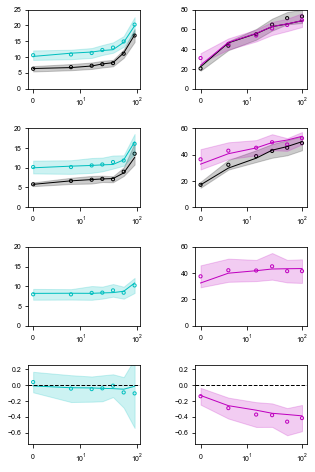

In [9]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()



for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]
    
    sol=ALL_sol[idx_species]
    cost=ALL_cost[idx_species]
    idx_best=np.argmin(cost)
    best_param=sol[idx_best,:]
    best_cost=cost[idx_best]
    best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)
    
    Predictions=Predictor_data(best_inputs,best_param,nCon)
    print(['Mice','Monkeys'][idx_species],best_cost)
    print(repr(best_param))
    print(repr(best_inputs))        
    for idx_moment in range(6):
        if idx_moment<2:
            idx_row=0
            ccc=['k',colors[idx_species]][idx_moment]
            ymin=0
            ymax=[25,80][idx_species]
            
        if (idx_moment>=2)&(idx_moment<4):
            idx_row=1
            ccc=['k',colors[idx_species]][idx_moment-2]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==4):
            idx_row=2
            ccc=colors[idx_species]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==5):
            idx_row=3
            ccc=colors[idx_species]
            ymin=-0.75
            ymax=0.25
                     
        m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
        axs[2*idx_row+idx_species].scatter(Con,m,
                                           facecolors='none', s=10,edgecolors=ccc,marker='o'
                                           )
        axs[2*idx_row+idx_species].fill_between(Con,m-sem,m+sem,
                                                 color=ccc,alpha=0.2)
    
        axs[2*idx_row+idx_species].plot(Con,Predictions[idx_moment,:],
                                        color=ccc,alpha=1.)

        axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)
        axs[2*idx_row+idx_species].set_ylim([ymin,ymax])
    axs[2*idx_row+idx_species].axhline(y=0,ls='--',c='k')

# Combined

In [10]:
DATA_both_species=[dataset_both_species,Con_both_species,nCon_both_species,normalization_both_species]
CMB_sol,CMB_cost=fun.fit_model_to_data_both_species(DATA_both_species,Predictor_data,nCon,nRep)


rep= 0  param init= [ 3.98  2.65 -0.92 -1.93 -0.55 -3.04]
[ 4.04  2.82 -0.99 -1.76 -0.53 -2.96] 39.37567979222939
rep= 1  param init= [ 7.2   2.04 -0.18 -1.93  0.62 -4.96]
[ 7.27  2.03 -0.18 -1.89  0.62 -4.97] 267.2496953476529
rep= 2  param init= [ 8.12  3.5  -0.43 -1.93 -0.41 -4.42]
[ 8.14  3.51 -0.43 -1.92 -0.41 -4.42] 557.7338563986863
rep= 3  param init= [ 6.08  2.36 -0.42 -1.93  0.59 -3.16]
[ 5.67  3.08 -0.63 -1.88  0.66 -3.36] 35.40274904854398
rep= 4  param init= [ 9.61  5.1  -0.78 -1.93 -0.25 -4.5 ]
[ 9.62  5.09 -0.78 -1.94 -0.24 -4.49] 247.0454002351141
rep= 5  param init= [ 8.91  3.2  -0.11 -1.93 -0.7  -3.36]
[10.    2.9   0.03 -1.97 -0.49 -3.28] 37.55989904515156
rep= 6  param init= [ 3.08  2.08 -0.07 -1.93  0.64 -4.72]
[ 3.08  2.08 -0.07 -1.93  0.64 -4.72] 920.5644355080169
rep= 7  param init= [ 6.86  3.54 -0.82 -1.93  0.4  -3.86]
[ 6.67  4.01 -0.89 -1.88  0.4  -3.87] 30.38506635941554
rep= 8  param init= [ 4.36  3.52 -0.63 -1.93 -0.25 -3.77]
[ 4.27  3.42 -0.74 -2.01 -0.16

[ 5.    3.4  -0.94 -2.01  0.4  -4.51] 247.58233657094962
rep= 72  param init= [ 8.99  4.85 -0.52 -1.93  1.   -3.48]
[ 8.29  5.37 -0.56 -1.82  0.99 -3.53] 29.620196608606772
rep= 73  param init= [ 4.07  2.87 -0.01 -1.93  0.79 -4.33]
[ 4.55  2.61  0.06 -1.75  0.79 -4.47] 355.2217552047985
rep= 74  param init= [ 3.49  2.3  -0.05 -1.93 -0.06 -3.94]
[ 3.49  2.26 -0.09 -1.99 -0.04 -3.86] 433.621150561142
rep= 75  param init= [ 9.    3.49 -0.58 -1.93 -0.32 -4.14]
[ 9.7   3.79 -0.84 -1.68 -0.26 -3.3 ] 31.701919978063536
rep= 76  param init= [ 6.6   5.65 -0.15 -1.93  0.15 -3.34]
[ 6.59  5.63 -0.22 -1.86  0.18 -3.48] 69.67272520917129
rep= 77  param init= [ 5.95  4.81 -0.84 -1.93  0.83 -4.93]
[ 7.1   4.67 -0.9  -1.75  0.92 -4.31] 25.770205398295943
rep= 78  param init= [ 3.15  2.64 -0.26 -1.93  0.94 -4.37]
[ 3.37  2.62 -0.27 -1.88  0.94 -4.36] 521.8086807846363
rep= 79  param init= [ 8.92  4.05 -0.87 -1.93  0.07 -4.14]
[ 8.81  5.23 -0.9  -1.8   0.06 -4.12] 30.61565626648182
rep= 80  param init= 

Mice 18.80207521122707
array([ 9.89,  2.27,  0.28, -1.95, -0.05, -2.94])
array([0.65, 0.71, 0.73, 0.78, 0.79, 0.94, 1.08, 0.93])
Monkeys 18.80207521122707
array([ 9.89,  2.27,  0.28, -1.95, -0.05, -2.94])
array([1.19, 1.51, 1.57, 1.62, 1.63, 1.66, 1.44])


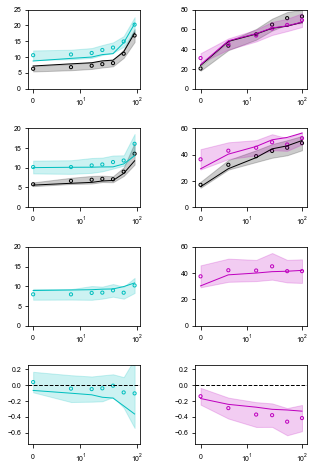

In [11]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()



for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]
    normalization=normalization_both_species[idx_species] 

    idx_best=np.argsort(CMB_cost)[0]
    best_param=CMB_sol[idx_best,:]
    best_cost=CMB_cost[idx_best]
    best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

    
    Predictions=Predictor_data(best_inputs,best_param,nCon)
    print(['Mice','Monkeys'][idx_species],best_cost)
    print(repr(best_param))
    print(repr(best_inputs))        
    for idx_moment in range(6):
        if idx_moment<2:
            idx_row=0
            ccc=['k',colors[idx_species]][idx_moment]
            ymin=0
            ymax=[25,80][idx_species]
            
        if (idx_moment>=2)&(idx_moment<4):
            idx_row=1
            ccc=['k',colors[idx_species]][idx_moment-2]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==4):
            idx_row=2
            ccc=colors[idx_species]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==5):
            idx_row=3
            ccc=colors[idx_species]
            ymin=-0.75
            ymax=0.25
                     
        m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
        axs[2*idx_row+idx_species].scatter(Con,m,
                                           facecolors='none', s=10,edgecolors=ccc,marker='o'
                                           )
        axs[2*idx_row+idx_species].fill_between(Con,m-sem,m+sem,
                                                 color=ccc,alpha=0.2)
    
        axs[2*idx_row+idx_species].plot(Con,Predictions[idx_moment,:],
                                        color=ccc,alpha=1.)

        axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)
        axs[2*idx_row+idx_species].set_ylim([ymin,ymax])
    axs[2*idx_row+idx_species].axhline(y=0,ls='--',c='k')

In [12]:
10**1.7

50.11872336272722

# Create data array

In [13]:
Tmax_over_tau_E=2*10**2
n_rep=20;

sigma_t=0.01; 
tau_rp=0.002; 



In [14]:
count=0;
for idx_rep in range(n_rep):
    for idx_combined in range(2):
        for idx_species in range(2):
            dataset=dataset_both_species[idx_species]
            Con=Con_both_species[idx_species]
            nCon=nCon_both_species[idx_species]
            normalization=normalization_both_species[idx_species] 
            if idx_combined==0:
                # best fit combined
                sol=ALL_sol[idx_species]
                cost=ALL_cost[idx_species]
                idx_best=np.argmin(cost)
                best_param=sol[idx_best,:]
            if idx_combined==1:
                # best fit in mice or monkeys
                idx_best=np.argmin(CMB_cost)
                best_param=CMB_sol[idx_best,:]
                best_cost=CMB_cost[idx_best]


            best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

            print(best_param,best_inputs)

            Possible_r_X=10**best_inputs[0:-1]
            ell=10**best_inputs[-1]

            g_E= best_param[0]; g_I=best_param[1];beta=10**best_param[2]; 
            K=500; 
            CV_K=10**best_param[3]
            sigma_Lambda_over_Lambda=10**best_param[4];
            J=10**best_param[5];
            for idx_r_X in range(len(Possible_r_X)):
                r_X=Possible_r_X[idx_r_X];

                data=np.ones((1,14));
                data[:,0]=J
                data[:,1]=r_X
                data[:,2]=sigma_Lambda_over_Lambda
                data[:,3]=Tmax_over_tau_E
                data[:,4]=sigma_t
                data[:,5]=tau_rp
                data[:,6]=g_E 
                data[:,7]=g_I
                data[:,8]=beta
                data[:,9]=K
                data[:,10]=ell
                data[:,11]=CV_K
                data[:,12]=idx_species
                data[:,13]=idx_combined

                if count==0:
                    DATA=data;
                if count>0:
                    DATA=np.vstack((DATA,data));
                count=count+1

len(DATA)



[ 7.83  6.67 -0.7  -1.52 -0.13 -2.82] [0.55 0.64 0.65 0.68 0.69 0.78 0.93 1.48]
[10.    2.    0.62 -1.9   0.73 -2.41] [1.19 1.5  1.59 1.65 1.66 1.69 1.41]
[ 9.89  2.27  0.28 -1.95 -0.05 -2.94] [0.65 0.71 0.73 0.78 0.79 0.94 1.08 0.93]
[ 9.89  2.27  0.28 -1.95 -0.05 -2.94] [1.19 1.51 1.57 1.62 1.63 1.66 1.44]
[ 7.83  6.67 -0.7  -1.52 -0.13 -2.82] [0.55 0.64 0.65 0.68 0.69 0.78 0.93 1.48]
[10.    2.    0.62 -1.9   0.73 -2.41] [1.19 1.5  1.59 1.65 1.66 1.69 1.41]
[ 9.89  2.27  0.28 -1.95 -0.05 -2.94] [0.65 0.71 0.73 0.78 0.79 0.94 1.08 0.93]
[ 9.89  2.27  0.28 -1.95 -0.05 -2.94] [1.19 1.51 1.57 1.62 1.63 1.66 1.44]
[ 7.83  6.67 -0.7  -1.52 -0.13 -2.82] [0.55 0.64 0.65 0.68 0.69 0.78 0.93 1.48]
[10.    2.    0.62 -1.9   0.73 -2.41] [1.19 1.5  1.59 1.65 1.66 1.69 1.41]
[ 9.89  2.27  0.28 -1.95 -0.05 -2.94] [0.65 0.71 0.73 0.78 0.79 0.94 1.08 0.93]
[ 9.89  2.27  0.28 -1.95 -0.05 -2.94] [1.19 1.51 1.57 1.62 1.63 1.66 1.44]
[ 7.83  6.67 -0.7  -1.52 -0.13 -2.82] [0.55 0.64 0.65 0.68 0.69 0.78 0

520

In [17]:
df = pd.DataFrame(DATA,columns=['J','r_X','sigma_Lambda_over_Lambda','Tmax_over_tau_E','sigma_t','tau_rp',
                                'g_E','g_I','beta','K','ell','CV_K','idx_species','idx_combined'])
file_name='simulation_param.txt'
df.to_csv(file_name, sep='\t')


In [18]:
len(DATA)

520

# simulation parameters to explore best fits combined

In [128]:
count=0;
for idx_rep in range(n_rep):
    for idx_combined in range(10):
        for idx_species in range(2):
            dataset=dataset_both_species[idx_species]
            Con=Con_both_species[idx_species]
            nCon=nCon_both_species[idx_species]
            normalization=normalization_both_species[idx_species] 

            idx_best=np.argsort(CMB_cost)[idx_combined]
            best_param=CMB_sol[idx_best,:]
            best_cost=CMB_cost[idx_best]
            print(best_cost)



            best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

            print(best_param,best_inputs)

            Possible_r_X=10**best_inputs[0:-1]
            ell=10**best_inputs[-1]

            g_E= best_param[0]; g_I=best_param[1];beta=10**best_param[2]; 
            K=500; 
            CV_K=10**best_param[3]
            sigma_Lambda_over_Lambda=10**best_param[4];
            J=10**best_param[5];
            for idx_r_X in range(len(Possible_r_X)):
                r_X=Possible_r_X[idx_r_X];

                data=np.ones((1,14));
                data[:,0]=J
                data[:,1]=r_X
                data[:,2]=sigma_Lambda_over_Lambda
                data[:,3]=Tmax_over_tau_E
                data[:,4]=sigma_t
                data[:,5]=tau_rp
                data[:,6]=g_E 
                data[:,7]=g_I
                data[:,8]=beta
                data[:,9]=K
                data[:,10]=ell
                data[:,11]=CV_K
                data[:,12]=idx_species
                data[:,13]=idx_combined

                if count==0:
                    DATA=data;
                if count>0:
                    DATA=np.vstack((DATA,data));
                count=count+1

len(DATA)



0.5504457434749176
[ 6.73  5.79 -0.46 -1.67  0.46 -3.  ] [0.62 0.67 0.69 0.7  0.71 0.79 0.95 0.61]
0.5504457434749176
[ 6.73  5.79 -0.46 -1.67  0.46 -3.  ] [1.19 1.45 1.53 1.59 1.62 1.64 1.4 ]
0.5752568033294958
[ 4.89  3.85 -0.09 -1.86  0.28 -3.  ] [0.45 0.48 0.5  0.51 0.51 0.66 0.9  0.44]
0.5752568033294958
[ 4.89  3.85 -0.09 -1.86  0.28 -3.  ] [1.07 1.4  1.48 1.54 1.58 1.6  1.18]
0.600033359943098
[ 7.70e+00  4.67e+00 -5.24e-01 -1.72e+00  9.04e-04 -3.00e+00] [0.61 0.64 0.67 0.68 0.67 0.78 1.04 1.09]
0.600033359943098
[ 7.70e+00  4.67e+00 -5.24e-01 -1.72e+00  9.04e-04 -3.00e+00] [1.19 1.52 1.61 1.65 1.68 1.7  1.7 ]
0.6005249926491292
[ 7.95  5.02 -0.51 -1.74 -0.01 -3.  ] [0.61 0.64 0.67 0.68 0.66 0.78 1.03 1.11]
0.6005249926491292
[ 7.95  5.02 -0.51 -1.74 -0.01 -3.  ] [1.19 1.52 1.61 1.65 1.68 1.7  1.7 ]
0.7441508630140412
[ 3.9   2.79 -0.18 -1.91 -0.02 -3.29] [0.62 0.64 0.67 0.69 0.7  0.85 1.06 0.54]
0.7441508630140412
[ 3.9   2.79 -0.18 -1.91 -0.02 -3.29] [1.23 1.51 1.59 1.66 1.69 

[ 7.70e+00  4.67e+00 -5.24e-01 -1.72e+00  9.04e-04 -3.00e+00] [0.61 0.64 0.67 0.68 0.67 0.78 1.04 1.09]
0.600033359943098
[ 7.70e+00  4.67e+00 -5.24e-01 -1.72e+00  9.04e-04 -3.00e+00] [1.19 1.52 1.61 1.65 1.68 1.7  1.7 ]
0.6005249926491292
[ 7.95  5.02 -0.51 -1.74 -0.01 -3.  ] [0.61 0.64 0.67 0.68 0.66 0.78 1.03 1.11]
0.6005249926491292
[ 7.95  5.02 -0.51 -1.74 -0.01 -3.  ] [1.19 1.52 1.61 1.65 1.68 1.7  1.7 ]
0.7441508630140412
[ 3.9   2.79 -0.18 -1.91 -0.02 -3.29] [0.62 0.64 0.67 0.69 0.7  0.85 1.06 0.54]
0.7441508630140412
[ 3.9   2.79 -0.18 -1.91 -0.02 -3.29] [1.23 1.51 1.59 1.66 1.69 1.7  1.07]
0.9326531178413491
[10.    2.21 -0.09 -1.72  0.22 -3.  ] [0.48 0.52 0.53 0.54 0.54 0.7  1.03 0.28]
0.9326531178413491
[10.    2.21 -0.09 -1.72  0.22 -3.  ] [1.14 1.42 1.5  1.56 1.6  1.63 1.42]
0.9484573048815802
[10.    2.73 -0.03 -1.74  0.86 -3.  ] [ 0.47  0.54  0.56  0.57  0.56  0.7   0.99 -0.29]
0.9484573048815802
[10.    2.73 -0.03 -1.74  0.86 -3.  ] [1.12 1.41 1.5  1.56 1.6  1.62 1.03]

[ 7.95  5.02 -0.51 -1.74 -0.01 -3.  ] [1.19 1.52 1.61 1.65 1.68 1.7  1.7 ]
0.7441508630140412
[ 3.9   2.79 -0.18 -1.91 -0.02 -3.29] [0.62 0.64 0.67 0.69 0.7  0.85 1.06 0.54]
0.7441508630140412
[ 3.9   2.79 -0.18 -1.91 -0.02 -3.29] [1.23 1.51 1.59 1.66 1.69 1.7  1.07]
0.9326531178413491
[10.    2.21 -0.09 -1.72  0.22 -3.  ] [0.48 0.52 0.53 0.54 0.54 0.7  1.03 0.28]
0.9326531178413491
[10.    2.21 -0.09 -1.72  0.22 -3.  ] [1.14 1.42 1.5  1.56 1.6  1.63 1.42]
0.9484573048815802
[10.    2.73 -0.03 -1.74  0.86 -3.  ] [ 0.47  0.54  0.56  0.57  0.56  0.7   0.99 -0.29]
0.9484573048815802
[10.    2.73 -0.03 -1.74  0.86 -3.  ] [1.12 1.41 1.5  1.56 1.6  1.62 1.03]
1.0030408632239494
[ 4.97  3.2  -0.56 -1.6   0.39 -3.36] [0.77 0.81 0.82 0.84 0.82 0.92 1.1  0.24]
1.0030408632239494
[ 4.97  3.2  -0.56 -1.6   0.39 -3.36] [1.27 1.5  1.57 1.62 1.66 1.68 1.08]
1.2433024811998896
[ 9.96  6.93 -0.71 -1.68  0.39 -4.13] [0.93 0.96 0.97 0.99 0.99 1.08 1.26 0.22]
1.2433024811998896
[ 9.96  6.93 -0.71 -1.68  0

[ 9.96  6.93 -0.71 -1.68  0.39 -4.13] [0.93 0.96 0.97 0.99 0.99 1.08 1.26 0.22]
1.2433024811998896
[ 9.96  6.93 -0.71 -1.68  0.39 -4.13] [1.35 1.65 1.7  1.7  1.7  1.7  0.89]
1.2964829316066693
[ 4.13  2.53 -0.53 -1.64  0.09 -3.31] [0.78 0.81 0.84 0.85 0.84 0.93 1.13 0.48]
1.2964829316066693
[ 4.13  2.53 -0.53 -1.64  0.09 -3.31] [1.34 1.53 1.61 1.66 1.7  1.7  1.21]
0.5504457434749176
[ 6.73  5.79 -0.46 -1.67  0.46 -3.  ] [0.62 0.67 0.69 0.7  0.71 0.79 0.95 0.61]
0.5504457434749176
[ 6.73  5.79 -0.46 -1.67  0.46 -3.  ] [1.19 1.45 1.53 1.59 1.62 1.64 1.4 ]
0.5752568033294958
[ 4.89  3.85 -0.09 -1.86  0.28 -3.  ] [0.45 0.48 0.5  0.51 0.51 0.66 0.9  0.44]
0.5752568033294958
[ 4.89  3.85 -0.09 -1.86  0.28 -3.  ] [1.07 1.4  1.48 1.54 1.58 1.6  1.18]
0.600033359943098
[ 7.70e+00  4.67e+00 -5.24e-01 -1.72e+00  9.04e-04 -3.00e+00] [0.61 0.64 0.67 0.68 0.67 0.78 1.04 1.09]
0.600033359943098
[ 7.70e+00  4.67e+00 -5.24e-01 -1.72e+00  9.04e-04 -3.00e+00] [1.19 1.52 1.61 1.65 1.68 1.7  1.7 ]
0.600524

[ 4.89  3.85 -0.09 -1.86  0.28 -3.  ] [0.45 0.48 0.5  0.51 0.51 0.66 0.9  0.44]
0.5752568033294958
[ 4.89  3.85 -0.09 -1.86  0.28 -3.  ] [1.07 1.4  1.48 1.54 1.58 1.6  1.18]
0.600033359943098
[ 7.70e+00  4.67e+00 -5.24e-01 -1.72e+00  9.04e-04 -3.00e+00] [0.61 0.64 0.67 0.68 0.67 0.78 1.04 1.09]
0.600033359943098
[ 7.70e+00  4.67e+00 -5.24e-01 -1.72e+00  9.04e-04 -3.00e+00] [1.19 1.52 1.61 1.65 1.68 1.7  1.7 ]
0.6005249926491292
[ 7.95  5.02 -0.51 -1.74 -0.01 -3.  ] [0.61 0.64 0.67 0.68 0.66 0.78 1.03 1.11]
0.6005249926491292
[ 7.95  5.02 -0.51 -1.74 -0.01 -3.  ] [1.19 1.52 1.61 1.65 1.68 1.7  1.7 ]
0.7441508630140412
[ 3.9   2.79 -0.18 -1.91 -0.02 -3.29] [0.62 0.64 0.67 0.69 0.7  0.85 1.06 0.54]
0.7441508630140412
[ 3.9   2.79 -0.18 -1.91 -0.02 -3.29] [1.23 1.51 1.59 1.66 1.69 1.7  1.07]
0.9326531178413491
[10.    2.21 -0.09 -1.72  0.22 -3.  ] [0.48 0.52 0.53 0.54 0.54 0.7  1.03 0.28]
0.9326531178413491
[10.    2.21 -0.09 -1.72  0.22 -3.  ] [1.14 1.42 1.5  1.56 1.6  1.63 1.42]
0.948457

2600

In [129]:
df = pd.DataFrame(DATA,columns=['J','r_X','sigma_Lambda_over_Lambda','Tmax_over_tau_E','sigma_t','tau_rp',
                                'g_E','g_I','beta','K','ell','CV_K','idx_species','idx_combined'])
file_name='simulation_param.txt'
df.to_csv(file_name, sep='\t')


In [130]:
len(DATA)

2600